In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv('final_data_en.csv')
data

,id,location,tweetcreatedts,text,class
0,1039,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety
1,1682,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
2,5275,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress
3,6069,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
4,6087,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...,...,...,...
39761,7813,"Charlotte, NC",2021-01-27 23:58:57+00:00,Im nervous ash to fly though,anxiety
39762,1305,NaN,2021-02-03 23:58:58+00:00,64E7B6DA :Battle ID\nI need backup!\nLvl 120 G...,lonely
39763,5192,"Doylestown, PA",2021-02-03 23:59:01+00:00,SNOW MUCH FUN writing about our snow days in @...,anxiety
39764,3607,"Upstate New York, USA",2021-02-07 04:04:45+00:00,Very time sensitive. I'm trans and my roommate...,anxiety


In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline

In [ ]:
data.isna().sum()

id                    0
location          13084
tweetcreatedts        0
text                  0
class                 0
dtype: int64

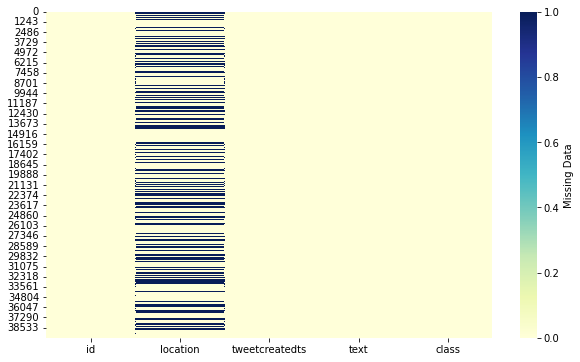

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['location']=data['location'].fillna('other')


In [ ]:
# pd.set_option('display.max_rows', None)
data['location'].value_counts()


other                     13084
United States               330
she/her                     296
Los Angeles, CA             211
California, USA             191
                          ...  
Great Tomb of Nazarick        1
Northumberland, UK            1
6.2758° N, 7.0068° E          1
permanent vacation            1
Doylestown, PA                1
Name: location, Length: 11404, dtype: int64

In [ ]:
x =data[data['location']=='United States']['class'].value_counts()

x


anxiety    106
normal      80
stress      75
lonely      69
Name: class, dtype: int64

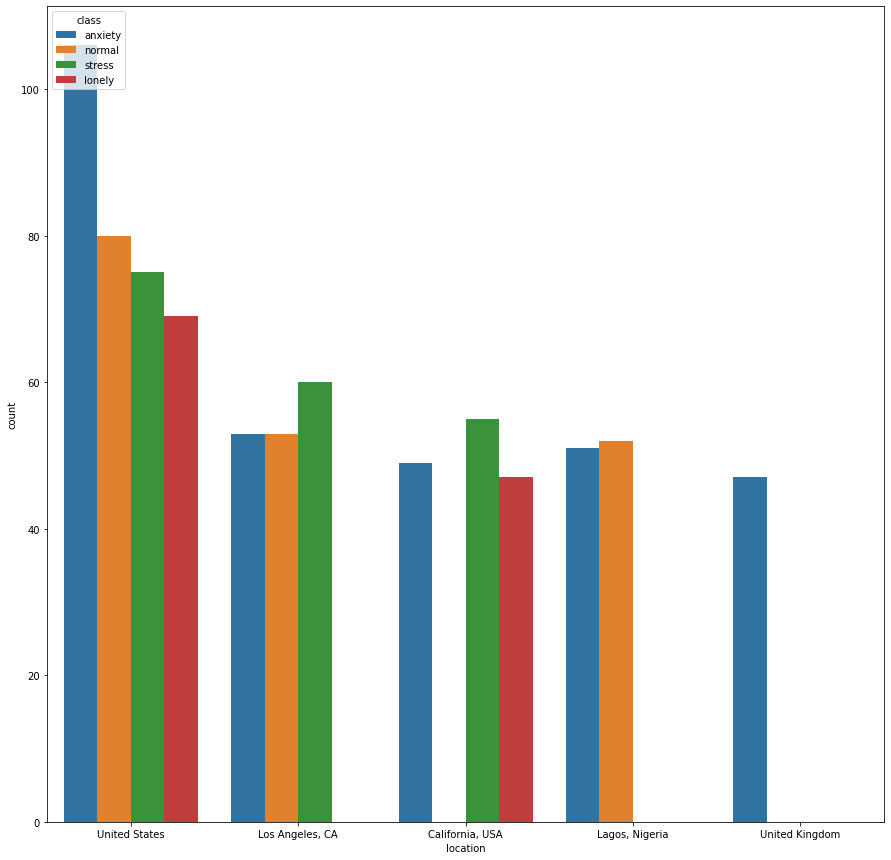

In [ ]:
# top five country that have mental health problem
data.drop(data[(data['location'] =='other') | (data['location'] == 'she/her')].index, inplace=True)

count=data[['location','class']].groupby(['class'])
fre=count['location'].value_counts()
tt=fre.reset_index(name='count')
tt=tt.sort_values(by='count',ascending=False).head(13)
plt.figure(figsize=(15,15))
sns.barplot(x=tt['location'], y=tt['count'],hue=tt['class'])
plt.savefig("distribution of classes over the most top countries have mental health problems.png", dpi=100)


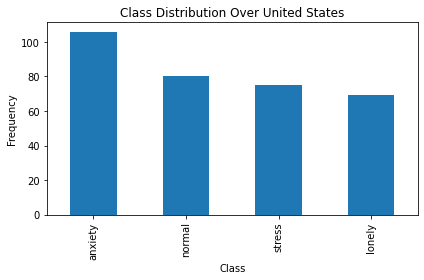

In [ ]:
plt.figure()
ax =data[data['location']=='United States']['class'].value_counts().plot(kind='bar')
ax.set_title('Class Distribution Over United States')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
data['location'].isna().sum()

0

In [ ]:
data['tweetcreatedts'].dtypes

dtype('O')

In [ ]:
data['tweetcreatedts']=pd.to_datetime(data['tweetcreatedts'], format="%Y/%m/%d")

In [ ]:
data['tweetcreatedts']

0       2021-02-08 19:07:40+00:00
1       2021-02-03 23:58:40+00:00
2       2021-01-27 23:57:59+00:00
3       2021-02-03 23:58:23+00:00
4       2021-02-12 20:27:58+00:00
                   ...           
39760   2021-02-12 20:46:01+00:00
39761   2021-01-27 23:58:57+00:00
39763   2021-02-03 23:59:01+00:00
39764   2021-02-07 04:04:45+00:00
39765   2021-02-03 23:58:34+00:00
Name: tweetcreatedts, Length: 26386, dtype: datetime64[ns, UTC]

In [ ]:
data['Year'] =data['tweetcreatedts'].dt.year
data['Month'] = data['tweetcreatedts'].dt.month
data['Day'] = data['tweetcreatedts'].dt.day

In [ ]:
data['Week_Number'] = data['tweetcreatedts'].dt.isocalendar().week
data['day_name']=data['tweetcreatedts'].dt.day_name()
data

,id,location,tweetcreatedts,text,class,Year,Month,Day,Week_Number,day_name
0,1039,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety,2021,2,8,6,Monday
1,1682,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely,2021,2,3,5,Wednesday
2,5275,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress,2021,1,27,4,Wednesday
3,6069,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety,2021,2,3,5,Wednesday
4,6087,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal,2021,2,12,6,Friday
...,...,...,...,...,...,...,...,...,...,...
39760,8855,hogwarts,2021-02-12 20:46:01+00:00,RT @threenxq: The Korean light is so cheating ...,normal,2021,2,12,6,Friday
39761,7813,"Charlotte, NC",2021-01-27 23:58:57+00:00,Im nervous ash to fly though,anxiety,2021,1,27,4,Wednesday
39763,5192,"Doylestown, PA",2021-02-03 23:59:01+00:00,SNOW MUCH FUN writing about our snow days in @...,anxiety,2021,2,3,5,Wednesday
39764,3607,"Upstate New York, USA",2021-02-07 04:04:45+00:00,Very time sensitive. I'm trans and my roommate...,anxiety,2021,2,7,5,Sunday


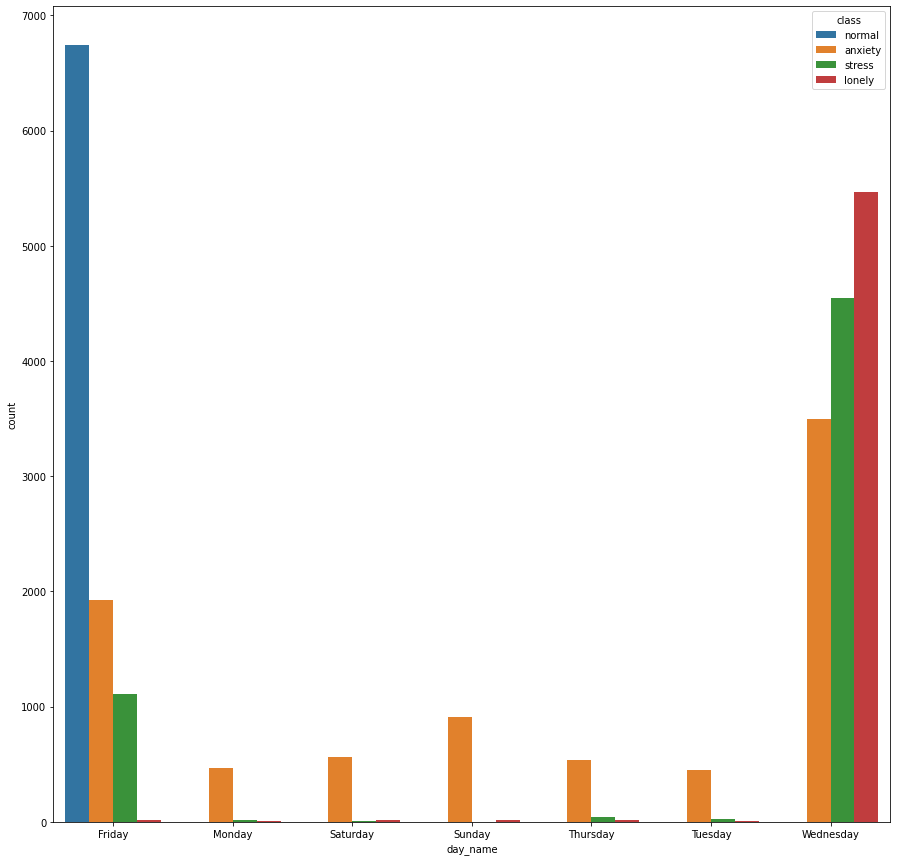

In [ ]:
week=data[['day_name','class']].groupby(['day_name'])
new=week['class'].value_counts()
cc=new.reset_index(name='count')
plt.figure(figsize=(15,15))
sns.barplot(x=cc['day_name'], y=cc['count'],hue=cc['class'])

plt.savefig("distribution of classes over day of the week .png", dpi=100)